# 서울시 동물등록현황

## import 모음

In [ ]:
import pandas as pd
import os
from datetime import datetime
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터 read, 객체 저장

In [ ]:
# path 저장, file_names 리스트 만들기
path = './data/서울시/동물등록현황/'

file_names = []
for (root, directories, files) in os.walk(path):
    print(root)
    print()
    print(directories)
    print()
    print(files)
    print()
    for i in files:
        file_names.append(i)

# 인코딩 오류를 피하기 위해 file_names 분리
file_names1 = file_names[:20]
file_names2 = file_names[20:]

# 구별로 데이터를 하나로 모아 우선 저장하기 위해
# key 는 '자치구', value 는 데이터프레임인 딕셔너리 만들기
data = {}
for i in range(len(file_names1)):
    file_name = file_names1[i]
    direction = path + file_name
    # 자치구명 추출, 열 추가
    if '_' in file_name[6:10]:
        temp = str(file_name[6:9])
    else:
        temp = str(file_name[6:10])
    data[temp] = pd.read_csv(direction, encoding='cp949')
    data[temp]['자치구'] = temp

./data/서울시/동물등록현황/

[]

['서울특별시 강동구_동물등록현황_20210801.csv', '서울특별시 강서구_동별 반려동물 등록 현황_20210222.csv', '서울특별시 구로구_법정동별 동물등록 현황_20220430.csv', '서울특별시 금천구_반려동물 등록 현황 및 등록 인구 수_20220226.csv', '서울특별시 노원구_반려동물현황_20220828.csv', '서울특별시 동대문구_동별반려동물 현황_20220718.csv', '서울특별시 서대문구_반려동물 등록 현황_20211231.csv', '서울특별시 서초구_동별 개 등록수 및 소유자수_20210630.csv', '서울특별시 성북구_동별 반려동물 등록현황_20210831.csv', '서울특별시 송파구_동별반려동물등록현황_20210916.csv', '서울특별시 용산구_반려동물등록현황_20220512.csv', '서울특별시 종로구_반려동물등록현황_20220407.csv', '서울특별시 중구_반려동물 등록현황_20220223.csv', '서울특별시_강남구_반려동물등록현황_20220825.csv', '서울특별시_강북구_동물관련 현황_20200917.csv', '서울특별시_관악구_반려동물 등록현황_20210222.csv', '서울특별시_광진구_반려동물 등록현황_20220207.csv', '서울특별시_도봉구_반려동물등록현황_20191016..csv', '서울특별시_동작구_반려동물등록현황_20220818.csv', '서울특별시_마포구_동물등록현황_20201117.csv', '서울특별시_성동구_반려동물현황_20220818.csv', '서울특별시_양천구_동물등록현황_20220816.csv', '서울특별시_영등포구_반려동물등록현황_20220511.csv', '서울특별시_은평구_동물등록현황_20220701.csv', '서울특별시_중랑구_반려동물등록현황_20211013.csv']



In [ ]:
for i in range(len(file_names2)):
    file_name = file_names2[i]
    direction = path + file_name
    # 자치구명 추출, 열 추가
    if '_' in file_name[6:10]:
        temp = str(file_name[6:9])
    else:
        temp = str(file_name[6:10])
    data[temp] = pd.read_csv(direction, encoding='cp949')
    data[temp]['자치구'] = temp

## 데이터 확인

In [ ]:
print(data.keys())
len(file_names)

dict_keys(['강동구', '강서구', '구로구', '금천구', '노원구', '동대문구', '서대문구', '서초구', '성북구', '송파구', '용산구', '종로구', '중구_', '강남구', '강북구', '관악구', '광진구', '도봉구', '동작구', '마포구', '성동구', '양천구', '영등포구', '은평구', '중랑구'])


25

In [ ]:
data['강동구'][:3]

,읍면동,시군구,대행업체,기타(이벤트등),RFID내장형,RFID외장형,인식표,동물소유자당,집계기준,자치구
0,길동,97,1922,0,836,1062,121,1.26,2021년,강동구
1,강일동,18,796,0,406,387,21,1.17,2021년,강동구
2,고덕동,39,1260,0,626,622,51,1.25,2021년,강동구


## 데이터 정제

### 1 강동구

In [ ]:
df1 = data['강동구'].copy()
df1

,읍면동,시군구,대행업체,기타(이벤트등),RFID내장형,RFID외장형,인식표,동물소유자당,집계기준,자치구
0,길동,97,1922,0,836,1062,121,1.26,2021년,강동구
1,강일동,18,796,0,406,387,21,1.17,2021년,강동구
2,고덕동,39,1260,0,626,622,51,1.25,2021년,강동구
3,둔촌동,37,1487,0,611,865,48,1.20,2021년,강동구
4,명일동,30,1504,0,669,794,71,1.19,2021년,강동구
5,상일동,24,912,0,440,466,30,1.20,2021년,강동구
6,성내동,141,2830,0,1408,1401,162,1.31,2021년,강동구
7,암사동,71,3012,0,1217,1717,149,1.26,2021년,강동구
8,천호동,135,3966,0,1923,1992,186,1.31,2021년,강동구


In [ ]:
# 등록동물수 집계
df1['등록동물수'] = df1['시군구'] + df1['대행업체']
df1['소유자수'] = round(df1['등록동물수'] / df1['동물소유자당'])

# datetime 으로 타입 변환
for i in range(9):
    year = datetime.strptime(df1['집계기준'][i][:4], '%Y')
    df1['기준일자'] = year

In [ ]:
df1[:1]

,읍면동,시군구,대행업체,기타(이벤트등),RFID내장형,RFID외장형,인식표,동물소유자당,집계기준,자치구,등록동물수,소유자수,기준일자
0,길동,97,1922,0,836,1062,121,1.26,2021년,강동구,2019,1602.0,2021-01-01


In [ ]:
# df 에 맞추어 데이터 정제
df1 = pd.DataFrame(columns = ['자치구', '법정동', '등록동물수', '소유자수', '기준일자', '소유자당반려동물수'],
                  data = {'자치구':df1['자치구'],
                   '법정동':df1['읍면동'],
                   '등록동물수':df1['등록동물수'],
                   '소유자수':df1['소유자수'],
                   '기준일자':df1['기준일자'],
                   '소유자당반려동물수':df1['동물소유자당']})
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   자치구        9 non-null      object        
 1   법정동        9 non-null      object        
 2   등록동물수      9 non-null      int64         
 3   소유자수       9 non-null      float64       
 4   기준일자       9 non-null      datetime64[ns]
 5   소유자당반려동물수  9 non-null      float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 560.0+ bytes


### 2 강서구

In [ ]:
df2 = data['강서구'].copy()
df2[:3]

,법정동,개등록자수,개등록수,고양이등록자수,고양이등록수,기준일자,자치구
0,가양동,1707,2165,8.0,9.0,2021-02-22,강서구
1,개화동,109,159,NaN,NaN,2021-02-22,강서구
2,공항동,776,1056,NaN,NaN,2021-02-22,강서구


In [ ]:
# 고양이등록수 결측치 제외하고 등록동물수 구해서 열 만들기
for i in range(df2.shape[0]):
    if df2.isna()['고양이등록수'][i]:
        df2['고양이등록수'][i] = 0
    else:
        df2['고양이등록수'][i] = df2['고양이등록수'][i]
    if df2.isna()['고양이등록자수'][i]:
        df2['고양이등록자수'][i] = 0
    else:
        df2['고양이등록자수'][i] = df2['고양이등록자수'][i]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12768\2285974571.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['고양이등록수'][i] = df2['고양이등록수'][i]
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12768\2285974571.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['고양이등록자수'][i] = df2['고양이등록자수'][i]
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12768\2285974571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d

In [ ]:
df2[:2]

,법정동,개등록자수,개등록수,고양이등록자수,고양이등록수,기준일자,자치구
0,가양동,1707,2165,8.0,9.0,2021-02-22,강서구
1,개화동,109,159,0.0,0.0,2021-02-22,강서구


In [ ]:
# 등록동물수, 소유자당반려동물수 집계
df2['등록동물수'] = df2['개등록수'] + df2['고양이등록수']
df2['소유자수'] = df2['개등록자수'] + df2['고양이등록자수']
df2['소유자당반려동물수'] = round(df2['등록동물수'] / df2['소유자수'],2)

# datetime 으로 타입 변환
df2['기준일자'] = df2['기준일자'].astype('datetime64')

df2[:2]

,법정동,개등록자수,개등록수,고양이등록자수,고양이등록수,기준일자,자치구,등록동물수,소유자수,소유자당반려동물수
0,가양동,1707,2165,8.0,9.0,2021-02-22,강서구,2174.0,1715.0,1.27
1,개화동,109,159,0.0,0.0,2021-02-22,강서구,159.0,109.0,1.46


In [ ]:
# df 에 맞추어 데이터 정제
df2 = pd.DataFrame(columns = ['자치구', '법정동', '등록동물수', '소유자수', '기준일자', '소유자당반려동물수'],
                  data = {'자치구':df2['자치구'],
                   '법정동':df2['법정동'],
                   '등록동물수':df2['등록동물수'],
                   '소유자수': df2['소유자수'],
                   '기준일자':df2['기준일자'],
                   '소유자당반려동물수':df2['소유자당반려동물수']})
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   자치구        11 non-null     object        
 1   법정동        11 non-null     object        
 2   등록동물수      11 non-null     float64       
 3   소유자수       11 non-null     float64       
 4   기준일자       11 non-null     datetime64[ns]
 5   소유자당반려동물수  11 non-null     float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 656.0+ bytes


### 3 구로구

In [ ]:
df3 = data['구로구'].copy()
df3

,법정동,RFID내장형,RFID외장형,인식표,등록품종수,동물소유자수,동물소유자당동물등록수,자치구
0,궁동,180,130,27,36,269,1.25,구로구
1,항동,159,91,39,36,249,1.16,구로구
2,개봉동,1189,627,185,75,1663,1.20,구로구
3,고척동,740,310,95,60,959,1.19,구로구
4,구로동,1457,795,314,75,2172,1.18,구로구
5,오류동,678,311,102,55,922,1.18,구로구
6,온수동,96,66,20,31,158,1.15,구로구
7,천왕동,181,106,32,31,278,1.15,구로구
8,가리봉동,187,79,21,39,194,1.48,구로구
9,신도림동,424,202,77,55,606,1.16,구로구


In [ ]:
col_li3 = df3.columns.tolist()
col_li3

['법정동', ' RFID내장형', ' RFID외장형', '인식표', '등록품종수', '동물소유자수', '동물소유자당동물등록수', '자치구']

In [ ]:
# 등록동물수 집계
df3['등록동물수'] = df3[col_li3[1]] + df3[col_li3[2]] +df3[col_li3[3]]

# datetime 으로 타입 변환
df3['기준일자'] = datetime.strptime('2022-04-30', '%Y-%m-%d')

# 불필요한 열 제거
# df1 = df1.drop(['RFID내장형', 'RFID외장형', '인식표', '등록품종수'], axis=1)

In [ ]:
df3[:2]

,법정동,RFID내장형,RFID외장형,인식표,등록품종수,동물소유자수,동물소유자당동물등록수,자치구,등록동물수,기준일자
0,궁동,180,130,27,36,269,1.25,구로구,337,2022-04-30
1,항동,159,91,39,36,249,1.16,구로구,289,2022-04-30


In [ ]:
# df 에 맞추어 데이터 정제
df3 = pd.DataFrame(columns = ['자치구', '법정동', '등록동물수', '소유자수', '기준일자', '소유자당반려동물수'],
                  data = {'자치구':df3['자치구'],
                   '법정동':df3['법정동'],
                   '등록동물수':df3['등록동물수'],
                   '소유자수': df3['동물소유자수'],
                   '기준일자':df3['기준일자'],
                   '소유자당반려동물수':df3['동물소유자당동물등록수']})
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   자치구        10 non-null     object        
 1   법정동        10 non-null     object        
 2   등록동물수      10 non-null     int64         
 3   소유자수       10 non-null     int64         
 4   기준일자       10 non-null     datetime64[ns]
 5   소유자당반려동물수  10 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 608.0+ bytes


### 4 금천구

In [ ]:
df4 = data['금천구'].copy()
df4

,법정동,동물소유자수(전체),개체수(전체),동물소유자수(개),개체수(개),동물소유자수(고양이),개체수(고양이),비고,데이터 기준일자,자치구
0,가산동,760,986,746,970,14,16,동물보호관리시스템 통계로서 축종별 통계를 합산한 전체 통계에 미세한 불일치 있음,2022-02-26,금천구
1,독산동,4281,5557,4259,5523,27,34,동물보호관리시스템 통계로서 축종별 통계를 합산한 전체 통계에 미세한 불일치 있음,2022-02-26,금천구
2,시흥동,4742,6107,4717,6069,30,38,동물보호관리시스템 통계로서 축종별 통계를 합산한 전체 통계에 미세한 불일치 있음,2022-02-26,금천구


In [ ]:
# datetime 으로 타입 변환
df4['데이터 기준일자'] = df4['데이터 기준일자'].astype('datetime64')

In [ ]:
df4['소유자당반려동물수'] = round(df4['개체수(전체)'] / df4['동물소유자수(전체)'], 2)

In [ ]:
# df 에 맞추어 데이터 정제
df4 = pd.DataFrame(columns = ['자치구', '법정동', '등록동물수', '소유자수', '기준일자', '소유자당반려동물수'],
                  data = {'자치구':df4['자치구'],
                   '법정동':df4['법정동'],
                   '등록동물수':df4['개체수(전체)'],
                   '소유자수': df4['동물소유자수(전체)'],
                   '기준일자':df4['데이터 기준일자'],
                   '소유자당반려동물수':df4['소유자당반려동물수']})

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   자치구        3 non-null      object        
 1   법정동        3 non-null      object        
 2   등록동물수      3 non-null      int64         
 3   소유자수       3 non-null      int64         
 4   기준일자       3 non-null      datetime64[ns]
 5   소유자당반려동물수  3 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 272.0+ bytes


### 5 노원구

In [ ]:
df5 = data['노원구'].copy()
df5

,년도,읍면동(법정동),등록주체(시군구),등록주체(대행업체),등록주체(기타(이벤트등)),RFID종류(내장형),RFID종류(외장형),RFID종류(인식표),등록 품종수,동물소유자수,동물소유자당동물등록수,합계,미승인,반려,기준일자,자치구
0,2012,공릉동,0,8,0,8,0,0,7,7,1.14,8,0,0,2022-08-28,노원구
1,2012,상계동,0,7,0,7,0,0,4,5,1.40,7,0,0,2022-08-28,노원구
2,2012,월계동,0,4,0,4,0,0,2,3,1.33,4,0,0,2022-08-28,노원구
3,2012,중계동,0,1,0,1,0,0,1,1,1.00,1,0,0,2022-08-28,노원구
4,2012,하계동,0,1,0,1,0,0,1,1,1.00,1,0,0,2022-08-28,노원구
5,2013,공릉동,5,1666,0,448,1166,57,48,1440,1.16,1671,0,0,2022-08-28,노원구
6,2013,상계동,13,3277,0,925,2246,119,59,2784,1.18,3290,0,0,2022-08-28,노원구
7,2013,월계동,11,1221,0,319,797,116,43,1033,1.19,1232,0,0,2022-08-28,노원구
8,2013,중계동,3,1690,0,581,1044,68,42,1499,1.13,1693,0,0,2022-08-28,노원구
9,2013,하계동,2,601,0,180,413,10,33,514,1.17,603,0,0,2022-08-28,노원구


In [ ]:
df5['기준일자'] = df5['기준일자'].astype('datetime64')

In [ ]:
df5_grouped = df5.groupby(['읍면동(법정동)', '자치구', '기준일자'])[['합계', '동물소유자수']].sum(['합계', '동물소유자수'])
df5_grouped.reset_index(inplace=True)

In [ ]:
df5_grouped['소유자당반려동물수'] = round(df5_grouped['합계'] / df5_grouped['동물소유자수'],2)

In [ ]:
# df 에 맞추어 데이터 정제
df5_grouped = pd.DataFrame(columns = ['자치구', '법정동', '등록동물수', '소유자수', '기준일자', '소유자당반려동물수'],
                  data = {'자치구':df5_grouped['자치구'],
                   '법정동':df5_grouped['읍면동(법정동)'],
                   '등록동물수':df5_grouped['합계'],
                   '소유자수': df5_grouped['동물소유자수'],
                   '기준일자':df5_grouped['기준일자'],
                   '소유자당반려동물수':df5_grouped['소유자당반려동물수']})

In [ ]:
df5_grouped.info()
df5_copy = df5.copy()
df5 = df5_grouped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   자치구        5 non-null      object        
 1   법정동        5 non-null      object        
 2   등록동물수      5 non-null      int64         
 3   소유자수       5 non-null      int64         
 4   기준일자       5 non-null      datetime64[ns]
 5   소유자당반려동물수  5 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 368.0+ bytes


### 6 동대문구

In [ ]:
df6 = data['동대문구'].copy()
df6

,읍면동(법정동),등록주체_시군구,등록주체_대행업체,등록형태_내장형RFID,등록형태_외장형RFID,등록형태_인식표RFID,등록품종수,동물소유자수,동물소유자당동물등록수,총등록수,데이터기준일자,자치구
0,신설동,5,249,107,121,26,39,183,1.39,254,2022-07-18,동대문구
1,용두동,66,1624,714,859,119,74,1267,1.34,1692,2022-07-18,동대문구
2,이문동,57,2613,1225,1300,146,81,1578,1.69,2671,2022-07-18,동대문구
3,장안동,140,4421,2027,2298,237,87,3477,1.31,4562,2022-07-18,동대문구
4,전농동,80,2331,1314,959,140,77,1918,1.26,2413,2022-07-18,동대문구
5,제기동,48,1423,622,769,80,79,1111,1.32,1471,2022-07-18,동대문구
6,회기동,15,485,261,210,29,48,408,1.23,500,2022-07-18,동대문구
7,휘경동,44,1790,877,873,85,70,1454,1.26,1835,2022-07-18,동대문구
8,답십리동,107,3020,1721,1209,199,78,2276,1.37,3129,2022-07-18,동대문구
9,청량리동,35,1003,411,567,60,55,789,1.32,1038,2022-07-18,동대문구


In [ ]:
df6['기준일자'] = df6['데이터기준일자'].astype('datetime64')


In [ ]:
df6 = pd.DataFrame(columns = ['자치구', '법정동', '등록동물수', '소유자수', '기준일자', '소유자당반려동물수'],
                  data = {'자치구':df6['자치구'],
                   '법정동':df6['읍면동(법정동)'],
                   '등록동물수':df6['총등록수'],
                   '소유자수': df6['동물소유자수'],
                   '기준일자':df6['기준일자'],
                   '소유자당반려동물수':df6['동물소유자당동물등록수']})

In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   자치구        10 non-null     object        
 1   법정동        10 non-null     object        
 2   등록동물수      10 non-null     int64         
 3   소유자수       10 non-null     int64         
 4   기준일자       10 non-null     datetime64[ns]
 5   소유자당반려동물수  10 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 608.0+ bytes


### 7 서대문구

In [ ]:
df7 = data['서대문구'].copy()
df7

,연도,누적등록수(마리),기준일,자치구
0,2019,14090,2021-12-31,서대문구
1,2020,15232,2021-12-31,서대문구
2,2021,16944,2021-12-31,서대문구


In [ ]:
df7['기준일'] = df7['기준일'].astype('datetime64')


In [ ]:
df7 = pd.DataFrame(columns = ['자치구', '법정동', '등록동물수', '소유자수', '기준일자', '소유자당반려동물수'],
                  data = {'자치구':df7['자치구'],
                   '법정동':None,
                   '등록동물수':df7['누적등록수(마리)'],
                   '소유자수': None,
                   '기준일자':df7['기준일'],
                   '소유자당반려동물수':None})
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   자치구        3 non-null      object        
 1   법정동        0 non-null      object        
 2   등록동물수      3 non-null      int64         
 3   소유자수       0 non-null      object        
 4   기준일자       3 non-null      datetime64[ns]
 5   소유자당반려동물수  0 non-null      object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 272.0+ bytes


### 8 성북구

In [ ]:
df8 = data['성북구'].copy()
df8[:3]

,동,품종수,소유자수,등록수,합계,자치구
0,길음동,67,1621,1.24,2005,성북구
1,돈암동,60,1586,1.25,1978,성북구
2,석관동,59,1247,1.26,1573,성북구


In [ ]:
df8['기준일자'] = datetime.strptime('2021-08-31', '%Y-%m-%d')

In [ ]:
df8 = pd.DataFrame(columns = ['자치구', '법정동', '등록동물수', '소유자수', '기준일자', '소유자당반려동물수'],
                  data = {'자치구':df8['자치구'],
                   '법정동':df8['동'],
                   '등록동물수':df8['합계'],
                   '소유자수': df8['소유자수'],
                   '기준일자':df8['기준일자'],
                   '소유자당반려동물수':df8['등록수']})
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   자치구        39 non-null     object        
 1   법정동        39 non-null     object        
 2   등록동물수      39 non-null     int64         
 3   소유자수       39 non-null     int64         
 4   기준일자       39 non-null     datetime64[ns]
 5   소유자당반려동물수  39 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 2.0+ KB


### 9 송파구

In [ ]:
df9 = data['송파구'].copy()
df9[:2]

,자치구명,법정동명,등록동물수(마리),등록품종수,등록소유자수,동물소유자당등록동물수,해당동의등록대행업체수,데이터기준일자,자치구
0,송파구,가락동,3195,72,2642,1.21,6,2021-09-16,송파구
1,송파구,거여동,1531,64,1184,1.29,4,2021-09-16,송파구


In [ ]:
df9['기준일자'] = df9['데이터기준일자'].astype('datetime64')


In [ ]:
df9 = pd.DataFrame(columns = ['자치구', '법정동', '등록동물수', '소유자수', '기준일자', '소유자당반려동물수'],
                  data = {'자치구':df9['자치구'],
                   '법정동':df9['법정동명'],
                   '등록동물수':df9['등록동물수(마리)'],
                   '소유자수': df9['등록소유자수'],
                   '기준일자':df9['기준일자'],
                   '소유자당반려동물수':df9['동물소유자당등록동물수']})
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   자치구        13 non-null     object        
 1   법정동        13 non-null     object        
 2   등록동물수      13 non-null     int64         
 3   소유자수       13 non-null     int64         
 4   기준일자       13 non-null     datetime64[ns]
 5   소유자당반려동물수  13 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 752.0+ bytes


### 10 용산구

In [ ]:
df10 = data['용산구'].copy()
df10[:2]

,법정동,반려동물소유자수,반려동물수,자치구
0,갈월동,123,187,용산구
1,남영동,29,35,용산구


In [ ]:
df10['기준일자'] = datetime.strptime('2022-05-12', '%Y-%m-%d')
df10['소유자당반려동물수'] = round(df10['반려동물수'] / df10['반려동물소유자수'], 2)

In [ ]:
df10[:2]

,법정동,반려동물소유자수,반려동물수,자치구,기준일자,소유자당반려동물수
0,갈월동,123,187,용산구,2022-05-12,1.52
1,남영동,29,35,용산구,2022-05-12,1.21


In [ ]:
df10 = pd.DataFrame(columns = ['자치구', '법정동', '등록동물수', '소유자수', '기준일자', '소유자당반려동물수'],
                  data = {'자치구':df10['자치구'],
                   '법정동':df10['법정동'],
                   '등록동물수':df10['반려동물수'],
                   '소유자수': df10['반려동물소유자수'],
                   '기준일자':df10['기준일자'],
                   '소유자당반려동물수':df10['소유자당반려동물수']})
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   자치구        34 non-null     object        
 1   법정동        34 non-null     object        
 2   등록동물수      34 non-null     int64         
 3   소유자수       34 non-null     int64         
 4   기준일자       34 non-null     datetime64[ns]
 5   소유자당반려동물수  34 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 1.7+ KB


### 11 종로구

In [ ]:
df11 = data['종로구'].copy()
df11[:2]

,자치구명,법정동명,등록동물수(마리),등록품종수,등록소유자수,동물소유자당등록동물수,해당동의등록대행업체수,자치구
0,종로구,계동,83,20,67,1.24,81,종로구
1,종로구,재동,7,3,6,1.17,6,종로구


In [ ]:
df11['기준일자'] = datetime.strptime('2022-04-07', '%Y-%m-%d')


In [ ]:
df11 = pd.DataFrame(columns = ['자치구', '법정동', '등록동물수', '소유자수', '기준일자', '소유자당반려동물수'],
                  data = {'자치구':df11['자치구'],
                   '법정동':df11['법정동명'],
                   '등록동물수':df11['등록동물수(마리)'],
                   '소유자수': df11['등록소유자수'],
                   '기준일자':df11['기준일자'],
                   '소유자당반려동물수':df11['동물소유자당등록동물수']})
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   자치구        81 non-null     object        
 1   법정동        81 non-null     object        
 2   등록동물수      81 non-null     int64         
 3   소유자수       81 non-null     int64         
 4   기준일자       81 non-null     datetime64[ns]
 5   소유자당반려동물수  81 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 3.9+ KB


### 12 중구

In [ ]:
df12 = data['중구_'].copy()
df12[:2]

,읍면동(법정동),등록품종수,동물소유자수,동물소유자당동물등록수,자치구
0,다동,26,104,1.47,중구_
1,정동,21,38,1.16,중구_


In [ ]:
df12['예상등록동물수'] = round(df12['동물소유자수'] * df12['동물소유자당동물등록수'])
df12['기준일자'] = datetime.strptime('2022-02-23', '%Y-%m-%d')
df12['자치구'] = '중구'
df12[:2]

,읍면동(법정동),등록품종수,동물소유자수,동물소유자당동물등록수,자치구,예상등록동물수,기준일자
0,다동,26,104,1.47,중구,153.0,2022-02-23
1,정동,21,38,1.16,중구,44.0,2022-02-23


In [ ]:
df12 = pd.DataFrame(columns = ['자치구', '법정동', '등록동물수', '소유자수', '기준일자', '소유자당반려동물수'],
                  data = {'자치구':df12['자치구'],
                   '법정동':df12['읍면동(법정동)'],
                   '등록동물수':df12['예상등록동물수'],
                   '소유자수': df12['동물소유자수'],
                   '기준일자':df12['기준일자'],
                   '소유자당반려동물수':df12['동물소유자당동물등록수']})
df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   자치구        64 non-null     object        
 1   법정동        64 non-null     object        
 2   등록동물수      64 non-null     float64       
 3   소유자수       64 non-null     int64         
 4   기준일자       64 non-null     datetime64[ns]
 5   소유자당반려동물수  64 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 3.1+ KB


### 13 강남구

In [ ]:
df13 = data['강남구'].copy()
df13

,시도명,시군구명,동명,내장형 칩(RFID),외장형 칩(RFID),인식표,등록 품종수,동물 소유자수,동물 등록수,데이터기준일,자치구
0,서울특별시,강남구,개포동,1185,1699,305,74,2459,3189,2022-08-25,강남구
1,서울특별시,강남구,논현동,2010,1430,450,97,2792,3890,2022-08-25,강남구
2,서울특별시,강남구,대치동,1935,1756,518,91,3446,4209,2022-08-25,강남구
3,서울특별시,강남구,도곡동,1327,1279,271,69,2294,2877,2022-08-25,강남구
4,서울특별시,강남구,삼성동,1424,1022,456,88,2152,2902,2022-08-25,강남구
5,서울특별시,강남구,세곡동,274,306,61,54,505,641,2022-08-25,강남구
6,서울특별시,강남구,수서동,421,496,75,54,781,992,2022-08-25,강남구
7,서울특별시,강남구,신사동,435,325,114,69,670,874,2022-08-25,강남구
8,서울특별시,강남구,역삼동,2572,2033,491,100,3820,5096,2022-08-25,강남구
9,서울특별시,강남구,율현동,91,60,8,30,120,159,2022-08-25,강남구


In [ ]:
df13.columns

Index(['시도명', '시군구명', '동명', '내장형 칩(RFID)', '외장형 칩(RFID)', '인식표', '등록 품종수',
       '동물 소유자수', '동물 등록수', '데이터기준일', '자치구'],
      dtype='object')

In [ ]:
df13['데이터기준일'] = df13['데이터기준일'].astype('datetime64')
df13['소유자당반려동물수'] = round(df13['동물 등록수'] / df13['동물 소유자수'], 2)
df13[:2]

,시도명,시군구명,동명,내장형 칩(RFID),외장형 칩(RFID),인식표,등록 품종수,동물 소유자수,동물 등록수,데이터기준일,자치구,소유자당반려동물수
0,서울특별시,강남구,개포동,1185,1699,305,74,2459,3189,2022-08-25,강남구,1.30
1,서울특별시,강남구,논현동,2010,1430,450,97,2792,3890,2022-08-25,강남구,1.39


In [ ]:
df13 = pd.DataFrame(columns = ['자치구', '법정동', '등록동물수', '소유자수', '기준일자', '소유자당반려동물수'],
                  data = {'자치구':df13['자치구'],
                   '법정동':df13['동명'],
                   '등록동물수':df13['동물 등록수'],
                   '소유자수': df13['동물 소유자수'],
                   '기준일자':df13['데이터기준일'],
                   '소유자당반려동물수':df13['소유자당반려동물수']})
df13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   자치구        14 non-null     object        
 1   법정동        14 non-null     object        
 2   등록동물수      14 non-null     int64         
 3   소유자수       14 non-null     int64         
 4   기준일자       14 non-null     datetime64[ns]
 5   소유자당반려동물수  14 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 800.0+ bytes


### 14 강북구

In [ ]:
df14 = data['강북구'].copy()
df14 = df14.iloc[:5, :9]
df14['자치구'] = '강북구'
df.drop(4, axis=0, inplace=True)
df14

,읍면동(법정동),등록주체 시군구,등록주체 대행업체,RFID종류 내장형,RFID종류 외장형,RFID종류 인식표,등록품종수,동물소유자수,데이터기준일자,자치구
0,번동,110.0,2490.0,1171.0,1029.0,402.0,66.0,2039.0,2020-09-17,강북구
1,미아동,242.0,6407.0,3158.0,2084.0,1413.0,81.0,5237.0,2020-09-17,강북구
2,수유동,277.0,5457.0,2712.0,1749.0,1274.0,86.0,4399.0,2020-09-17,강북구
3,우이동,28.0,632.0,340.0,205.0,115.0,45.0,477.0,2020-09-17,강북구
4,합계,657.0,14986.0,7381.0,5067.0,3204.0,108.0,12152.0,2020-09-17,강북구


In [ ]:
df14['등록동물수'] = df14['등록주체 시군구'] + df14['등록주체 대행업체']
df14['데이터기준일자'] = df14['데이터기준일자'].astype('datetime64')
df14['소유자당반려동물수'] = round(df14['등록동물수'] / df14['동물소유자수'], 2)
df14[:1]

,읍면동(법정동),등록주체 시군구,등록주체 대행업체,RFID종류 내장형,RFID종류 외장형,RFID종류 인식표,등록품종수,동물소유자수,데이터기준일자,자치구,등록동물수,소유자당반려동물수
0,번동,110.0,2490.0,1171.0,1029.0,402.0,66.0,2039.0,2020-09-17,강북구,2600.0,1.28


In [ ]:
df14 = pd.DataFrame(columns = ['자치구', '법정동', '등록동물수', '소유자수', '기준일자', '소유자당반려동물수'],
                  data = {'자치구':df14['자치구'],
                   '법정동':df14['읍면동(법정동)'],
                   '등록동물수':df14['등록동물수'],
                   '소유자수': df14['동물소유자수'],
                   '기준일자':df14['데이터기준일자'],
                   '소유자당반려동물수':df14['소유자당반려동물수']})
df14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   자치구        5 non-null      object        
 1   법정동        5 non-null      object        
 2   등록동물수      5 non-null      float64       
 3   소유자수       5 non-null      float64       
 4   기준일자       5 non-null      datetime64[ns]
 5   소유자당반려동물수  5 non-null      float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 368.0+ bytes


### 15 관악구

In [ ]:
df15 = data['관악구'].copy()
df15

,시군명,읍면동명,등록동물수,(등록주체)시군구등록,(등록주체)대행업체등록,(등록주체)기타,내장형_무선인식(RFID)종류,외장형_무선인식(RFID)종류,인식표_무선인식(RFID),등록품종수,등록소유자수,동물소유자당등록동물수,해당동의등록대행업체수,데이터기준일자,자치구
0,서울시 관악구,남현동,871,24,847,7,404,375,92,52,680,1.28,1,2022-02-22,관악구
1,서울시 관악구,봉천동,9601,481,9120,11,4378,3666,1557,100,7477,1.28,12,2022-02-22,관악구
2,서울시 관악구,신림동,14555,620,13935,12,6860,4912,2783,115,10512,1.38,14,2022-02-22,관악구


In [ ]:
df15['데이터기준일자'] = df15['데이터기준일자'].astype('datetime64')
df15 = pd.DataFrame(columns = ['자치구', '법정동', '등록동물수', '소유자수', '기준일자', '소유자당반려동물수'],
                  data = {'자치구':df15['자치구'],
                   '법정동':df15['읍면동명'],
                   '등록동물수':df15['등록동물수'],
                   '소유자수': df15['등록소유자수'],
                   '기준일자':df15['데이터기준일자'],
                   '소유자당반려동물수':df15['동물소유자당등록동물수']})
df15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   자치구        3 non-null      object        
 1   법정동        3 non-null      object        
 2   등록동물수      3 non-null      int64         
 3   소유자수       3 non-null      int64         
 4   기준일자       3 non-null      datetime64[ns]
 5   소유자당반려동물수  3 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 272.0+ bytes


### 16 광진구

In [ ]:
df16 = data['광진구'].copy()
df16[:2]

,읍면동(법정동),등록주체(시군구),등록주체(대행업체),등록주체(기타),근거리 데이터 전송기술(RFID)종류_내장형,근거리 데이터 전송기술(RFID)종류_외장형,근거리 데이터 전송기술(RFID)종류_인식표,등록품종수,동물소유자수,동물소유자당동물등록수,자치구
0,능동,5,74,0,40,35,4,20,67,1.18,광진구
1,광장동,5,254,0,163,94,2,35,234,1.11,광진구


In [ ]:
df16['등록동물수'] = df16['등록주체(시군구)'] + df16['등록주체(대행업체)'] + df16['등록주체(기타)']
df16['기준일자'] = datetime.strptime('2022-02-07', '%Y-%m-%d')
df16 = pd.DataFrame(columns = ['자치구', '법정동', '등록동물수', '소유자수', '기준일자', '소유자당반려동물수'],
                  data = {'자치구':df16['자치구'],
                   '법정동':df16['읍면동(법정동)'],
                   '등록동물수':df16['등록동물수'],
                   '소유자수': df16['동물소유자수'],
                   '기준일자':df16['기준일자'],
                   '소유자당반려동물수':df16['동물소유자당동물등록수']})
df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   자치구        7 non-null      object        
 1   법정동        7 non-null      object        
 2   등록동물수      7 non-null      int64         
 3   소유자수       7 non-null      int64         
 4   기준일자       7 non-null      datetime64[ns]
 5   소유자당반려동물수  7 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 464.0+ bytes


### 17 도봉구

In [ ]:
df17 = data['도봉구'].copy()
df17

,행정동,등록수,자치구
0,쌍문동,"3,717건",도봉구
1,방학동,"3,481건",도봉구
2,도봉동,"2,081건",도봉구
3,창 동,"5,397건",도봉구


In [ ]:
df17['기준일자'] = datetime.strptime('2019-10-16', '%Y-%m-%d')

In [ ]:
for i in range(4):
    num = df17['등록수'][i][0] + df17['등록수'][i][2:5]
    df17['등록수'][i] = int(num)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12768\3494827393.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df17['등록수'][i] = int(num)


In [ ]:
df17 = pd.DataFrame(columns = ['자치구', '법정동', '등록동물수', '소유자수', '기준일자', '소유자당반려동물수'],
                  data = {'자치구':df17['자치구'],
                   '법정동':df17['행정동'],
                   '등록동물수':df17['등록수'],
                   '소유자수': None,
                   '기준일자':df17['기준일자'],
                   '소유자당반려동물수':None})

In [ ]:
df17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   자치구        4 non-null      object        
 1   법정동        4 non-null      object        
 2   등록동물수      4 non-null      object        
 3   소유자수       0 non-null      object        
 4   기준일자       4 non-null      datetime64[ns]
 5   소유자당반려동물수  0 non-null      object        
dtypes: datetime64[ns](1), object(5)
memory usage: 320.0+ bytes


### 18 동작구

In [ ]:
df18 = data['동작구'].copy()
df18


,시군구,법정동,내장형,외장형,인식표,반려동물총계,등록품종수,동물소유자수,동물소유자당동물등록수,자치구
0,서울특별시 동작구,본동,255,216,68,539,53,428,1.26,동작구
1,서울특별시 동작구,대방동,768,871,230,1869,72,1510,1.24,동작구
2,서울특별시 동작구,동작동,154,127,24,305,41,256,1.19,동작구
3,서울특별시 동작구,사당동,2196,2236,454,4886,101,3701,1.32,동작구
4,서울특별시 동작구,상도동,2700,2368,593,5661,93,4437,1.28,동작구
5,서울특별시 동작구,흑석동,757,754,96,1607,74,1270,1.27,동작구
6,서울특별시 동작구,상도1동,203,214,43,460,44,357,1.29,동작구
7,서울특별시 동작구,노량진동,682,577,147,1406,69,1088,1.29,동작구
8,서울특별시 동작구,신대방동,1033,988,235,2256,67,1773,1.27,동작구


In [ ]:
df18['기준일자'] = datetime.strptime('2022-08-18', '%Y-%m-%d')
df18 = pd.DataFrame(columns = ['자치구', '법정동', '등록동물수', '소유자수', '기준일자', '소유자당반려동물수'],
                  data = {'자치구':df18['자치구'],
                   '법정동':df18['법정동'],
                   '등록동물수':df18['반려동물총계'],
                   '소유자수': df18['동물소유자수'],
                   '기준일자':df18['기준일자'],
                   '소유자당반려동물수':df18['동물소유자당동물등록수']})


In [ ]:
df18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   자치구        9 non-null      object        
 1   법정동        9 non-null      object        
 2   등록동물수      9 non-null      int64         
 3   소유자수       9 non-null      int64         
 4   기준일자       9 non-null      datetime64[ns]
 5   소유자당반려동물수  9 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 560.0+ bytes


### 19 마포구

In [ ]:
df19 = data['마포구'].copy()
df19 = df19.iloc[:-1, :]
df19.drop('Unnamed: 5', axis=1, inplace=True)
df19.drop(26, axis=0, inplace=True)
df19

,법정동,RFID 내장형,RFID 외장형,RFID 인식표,합계,자치구
0,중동,253.0,199.0,58.0,510.0,마포구
1,공덕동,656.0,452.0,93.0,1201.0,마포구
2,구수동,21.0,24.0,7.0,52.0,마포구
3,당인동,37.0,33.0,3.0,73.0,마포구
4,대흥동,332.0,195.0,42.0,569.0,마포구
5,도화동,524.0,411.0,95.0,1030.0,마포구
6,동교동,131.0,122.0,18.0,271.0,마포구
7,마포동,65.0,48.0,17.0,130.0,마포구
8,망원동,1307.0,884.0,308.0,2499.0,마포구
9,상수동,204.0,154.0,25.0,383.0,마포구


In [ ]:
df19['기준일자'] = datetime.strptime('2020-11-17', '%Y-%m-%d')
df19 = pd.DataFrame(columns = ['자치구', '법정동', '등록동물수', '소유자수', '기준일자', '소유자당반려동물수'],
                  data = {'자치구':df19['자치구'],
                   '법정동':df19['법정동'],
                   '등록동물수':df19['합계'],
                   '소유자수': None,
                   '기준일자':df19['기준일자'],
                   '소유자당반려동물수':None})


In [ ]:
df19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   자치구        27 non-null     object        
 1   법정동        27 non-null     object        
 2   등록동물수      27 non-null     float64       
 3   소유자수       0 non-null      object        
 4   기준일자       27 non-null     datetime64[ns]
 5   소유자당반려동물수  0 non-null      object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 1.4+ KB


### 20 성동구

In [ ]:
df20 = data['성동구'].copy()
df20

,법정동,등록수,데이터기준일자,자치구
0,도선동,267,2022-08-18,성동구
1,마장동,1067,2022-08-18,성동구
2,사근동,313,2022-08-18,성동구
3,송정동,677,2022-08-18,성동구
4,옥수동,1612,2022-08-18,성동구
5,용답동,756,2022-08-18,성동구
6,응봉동,923,2022-08-18,성동구
7,행당동,2026,2022-08-18,성동구
8,홍익동,203,2022-08-18,성동구
9,금호동1가,1025,2022-08-18,성동구


In [ ]:
df20['데이터기준일자'] = df20['데이터기준일자'].astype('datetime64')
df20 = pd.DataFrame(columns = ['자치구', '법정동', '등록동물수', '소유자수', '기준일자', '소유자당반려동물수'],
                  data = {'자치구':df20['자치구'],
                   '법정동':df20['법정동'],
                   '등록동물수':df20['등록수'],
                   '소유자수': None,
                   '기준일자':df20['데이터기준일자'],
                   '소유자당반려동물수':None})


In [ ]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   자치구        17 non-null     object        
 1   법정동        17 non-null     object        
 2   등록동물수      17 non-null     int64         
 3   소유자수       0 non-null      object        
 4   기준일자       17 non-null     datetime64[ns]
 5   소유자당반려동물수  0 non-null      object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 944.0+ bytes


### 21 영등포구

In [ ]:
df21 = data['영등포구'].copy()
df21 = df21.iloc[:-1, :]
df21.drop(['Unnamed: 6', 'Unnamed: 7'], axis=1, inplace=True)
df21[:2]

,읍면동(법정동),내장형 RFID,외장형 RFID,인식표 RFID,동물등록수합계(마리),동물소유자수(명),자치구
0,당산동,129.0,126.0,27.0,282.0,238.0,영등포구
1,대림동,1048.0,1195.0,326.0,2569.0,2045.0,영등포구


In [ ]:
df21['소유자당반려동물수'] = round(df21['동물등록수합계(마리)'] / df21['동물소유자수(명)'], 2)

In [ ]:
df21['기준일자'] = datetime.strptime('2022-05-11', '%Y-%m-%d')

In [ ]:
df21 = pd.DataFrame(columns = ['자치구', '법정동', '등록동물수', '소유자수', '기준일자', '소유자당반려동물수'],
                  data = {'자치구':df21['자치구'],
                   '법정동':df21['읍면동(법정동)'],
                   '등록동물수':df21['동물등록수합계(마리)'],
                   '소유자수': df21['동물소유자수(명)'],
                   '기준일자':df21['기준일자'],
                   '소유자당반려동물수':df21['소유자당반려동물수']})
df21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   자치구        32 non-null     object        
 1   법정동        32 non-null     object        
 2   등록동물수      32 non-null     float64       
 3   소유자수       32 non-null     float64       
 4   기준일자       32 non-null     datetime64[ns]
 5   소유자당반려동물수  32 non-null     float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.6+ KB


### 22 중랑구

In [ ]:
df22 = data['중랑구'].copy()
df22

,법정동,등록동물품종(개),등록동물품종(고양이),반려동물소유자수(개),반려동물소유자수(고양이),데이터기준일자,자치구
0,면목동,7603,20,5900,19,2021-10-13,중랑구
1,상봉동,2211,8,1731,8,2021-10-13,중랑구
2,중화동,2419,4,1917,4,2021-10-13,중랑구
3,묵동,2437,4,1973,4,2021-10-13,중랑구
4,망우동,2329,11,1789,9,2021-10-13,중랑구
5,신내동,2571,5,2096,4,2021-10-13,중랑구


In [ ]:
df22['등록동물수'] = df22['등록동물품종(개) '] + df22['등록동물품종(고양이)']
df22['소유자수'] = df22['반려동물소유자수(개) '] + df22['반려동물소유자수(고양이)']
df22['소유자당반려동물수'] = round(df22['등록동물수'] / df22['소유자수'], 2)

In [ ]:
df22['데이터기준일자'] = df22['데이터기준일자'].astype('datetime64')


In [ ]:
df22 = pd.DataFrame(columns = ['자치구', '법정동', '등록동물수', '소유자수', '기준일자', '소유자당반려동물수'],
                  data = {'자치구':df22['자치구'],
                   '법정동':df22['법정동'],
                   '등록동물수':df22['등록동물수'],
                   '소유자수': df22['소유자수'],
                   '기준일자':df22['데이터기준일자'],
                   '소유자당반려동물수':df22['소유자당반려동물수']})


In [ ]:
df22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   자치구        6 non-null      object        
 1   법정동        6 non-null      object        
 2   등록동물수      6 non-null      int64         
 3   소유자수       6 non-null      int64         
 4   기준일자       6 non-null      datetime64[ns]
 5   소유자당반려동물수  6 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 416.0+ bytes


### 23 은평구

In [ ]:
df23 = data['은평구'].copy()
df23

,법정동,동물등록 수,동물소유자수,데이터기준일자,자치구
0,갈현동,3414,2542,2022-07-01,은평구
1,구산동,2037,1547,2022-07-01,은평구
2,녹번동,2281,1734,2022-07-01,은평구
3,대조동,1953,1499,2022-07-01,은평구
4,불광동,3847,2886,2022-07-01,은평구
5,수색동,698,530,2022-07-01,은평구
6,신사동,2930,2259,2022-07-01,은평구
7,역촌동,3206,2434,2022-07-01,은평구
8,응암동,4763,3659,2022-07-01,은평구
9,증산동,883,701,2022-07-01,은평구


In [ ]:
df23['소유자당반려동물수'] = round(df23['동물등록 수'] / df23['동물소유자수'], 2)

In [ ]:
df23 = pd.DataFrame(columns = ['자치구', '법정동', '등록동물수', '소유자수', '기준일자', '소유자당반려동물수'],
                  data = {'자치구':df23['자치구'],
                   '법정동':df23['법정동'],
                   '등록동물수':df23['동물등록 수'],
                   '소유자수': df23['동물소유자수'],
                   '기준일자':df23['데이터기준일자'],
                   '소유자당반려동물수':df23['소유자당반려동물수']})


### 24 양천구

In [ ]:
df24 = data['양천구'].copy()
df24

,법정동,동물 등록건수,데이터기준일자,자치구
0,목동,8072,2022-08-16,양천구
1,신월동,7375,2022-08-16,양천구
2,신정동,9116,2022-08-16,양천구


In [ ]:
df24.keys().to_list()[1]

'동물 등록건수'

In [ ]:
df24 = pd.DataFrame(columns = ['자치구', '법정동', '등록동물수', '소유자수', '기준일자', '소유자당반려동물수'],
                  data = {'자치구':df24['자치구'],
                   '법정동':df24['법정동'],
                   '등록동물수':df24['동물 등록건수'],
                   '소유자수': None,
                   '기준일자':df24['데이터기준일자'],
                   '소유자당반려동물수':None})


### 25 서초구

In [ ]:
df25 = data['서초구'].copy()
df25

,읍면동,동물소유자수,합계,자치구
0,내곡동,288,405,서초구
1,반포동,3845,4914,서초구
2,방배동,4892,6107,서초구
3,서초동,4432,5753,서초구
4,신원동,218,290,서초구
5,양재동,1591,2078,서초구
6,염곡동,46,75,서초구
7,우면동,1033,1346,서초구
8,원지동,10,12,서초구
9,잠원동,2393,2973,서초구


In [ ]:
df25['소유자당반려동물수'] = round(df25['합계'] / df25['동물소유자수'], 2)

In [ ]:
df25 = pd.DataFrame(columns = ['자치구', '법정동', '등록동물수', '소유자수', '기준일자', '소유자당반려동물수'],
                  data = {'자치구':df25['자치구'],
                   '법정동':df25['읍면동'],
                   '등록동물수':df25['합계'],
                   '소유자수': df25['동물소유자수'],
                   '기준일자': None,
                   '소유자당반려동물수':df25['소유자당반려동물수']})


## 최종 df

In [ ]:
# 최종결과물 df
df = pd.DataFrame(columns = ['자치구', '법정동', '등록동물수', '소유자수', '기준일자', '소유자당반려동물수'])
df

,자치구,법정동,등록동물수,소유자수,기준일자,소유자당반려동물수


In [ ]:
df = pd.concat([df, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12,
               df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24, df25], axis=0, ignore_index=True)

In [ ]:
df['기준일자'] = df['기준일자'].astype('datetime64')
df['등록동물수'] = df['등록동물수'].astype('int64')
df['소유자수'] = df['소유자수'].astype('float64')
df['소유자당반려동물수'] = df['소유자당반려동물수'].astype('float64')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12768\122771292.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df['기준일자'] = df['기준일자'].astype('datetime64')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   자치구        430 non-null    object        
 1   법정동        427 non-null    object        
 2   등록동물수      430 non-null    int64         
 3   소유자수       376 non-null    float64       
 4   기준일자       406 non-null    datetime64[ns]
 5   소유자당반려동물수  376 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 20.3+ KB


In [ ]:
# 법정동 1동, 2동, 3동 묶기
df['temp'] = df['법정동'].str.replace('[^가-힣]', '')

df = df.groupby(['자치구','temp'], as_index=False)[['등록동물수', '소유자수', '소유자당반려동물수']].agg('sum')


In [ ]:
df.columns = ['자치구', '법정동', '등록동물수', '소유자수', '소유자당반려동물수']

In [ ]:
df[df['법정동']=='합계']

,자치구,법정동,등록동물수,소유자수,소유자당반려동물수


In [ ]:
df.to_csv('./data/서울시동물등록현황.csv', index=False, encoding='cp949')

In [ ]:
import pandas as pd
register = pd.read_csv('./data/서울시동물등록현황.csv', encoding='cp949')
df = register.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   자치구        334 non-null    object 
 1   법정동        334 non-null    object 
 2   등록동물수      334 non-null    int64  
 3   소유자수       334 non-null    float64
 4   소유자당반려동물수  334 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 13.2+ KB


- 서울시 인구밀도 데이터와 법정동 데이터가 달라서 합치기 위해 정제하는 과정. 하지만 꼭 필요한 데이터인가 의문이 들어 중단.

In [ ]:
df[df['자치구'] == '마포구']

In [ ]:
i = 87
j = 89
for i in range(1):
    df.iloc[i]['등록동물수'] = df.iloc[i]['등록동물수'] +df.iloc[j]['등록동물수']
    df.iloc[i]['소유자수'] = df.iloc[i]['소유자수']+ df.iloc[j]['소유자수']
    df.drop(j, axis=0, inplace=True)

df.to_csv('./data/(작업중)서울시동물등록현황.csv', index=False, encoding='cp949')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16000\699609984.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[i]['등록동물수'] = df.iloc[i]['등록동물수'] +df.iloc[j]['등록동물수']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16000\699609984.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[i]['소유자수'] = df.iloc[i]['소유자수']+ df.iloc[j]['소유자수']


# 군집화 (n=8)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
register = pd.read_csv('./data/서울시동물등록현황.csv', encoding='cp949')

register['소유자당반려동물수'] = round(register['등록동물수'] / register['소유자수'], 2)
register

,자치구,법정동,등록동물수,소유자수,소유자당반려동물수
0,강남구,개포동,3189,2459.0,1.30
1,강남구,논현동,3890,2792.0,1.39
2,강남구,대치동,4209,3446.0,1.22
3,강남구,도곡동,2877,2294.0,1.25
4,강남구,삼성동,2902,2152.0,1.35
...,...,...,...,...,...
329,중랑구,면목동,7623,5919.0,1.29
330,중랑구,묵동,2441,1977.0,1.23
331,중랑구,상봉동,2219,1739.0,1.28
332,중랑구,신내동,2576,2100.0,1.23


In [ ]:
register_df = register.iloc[:, 2:4]

In [ ]:
register_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   등록동물수   334 non-null    int64  
 1   소유자수    334 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.3 KB


In [ ]:
register_df['소유자수'] = register_df['소유자수'].astype('int')

In [ ]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
kmeans = KMeans(n_clusters=8, init='k-means++', max_iter=1000, random_state=0)
kmeans.fit(register_df)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(max_iter=1000, random_state=0)

In [ ]:
print(kmeans.labels_)

[4 4 4 4 4 7 7 7 2 1 0 2 7 2 7 7 2 2 2 7 4 4 4 1 2 1 7 2 0 7 2 4 7 4 2 0 0
 3 7 3 3 0 7 0 0 7 7 0 0 2 7 2 0 7 7 0 0 0 7 1 1 1 3 4 1 2 7 5 5 5 4 0 2 2
 4 2 7 7 0 2 7 2 0 0 1 1 2 2 7 0 0 0 0 7 0 0 5 0 7 7 5 0 0 0 7 7 0 0 0 0 0
 0 7 0 0 1 1 1 0 2 0 7 0 4 5 0 7 0 0 5 0 7 0 7 7 7 0 2 2 0 0 7 7 0 2 7 0 7
 4 4 2 2 4 2 2 4 4 2 2 2 2 2 1 2 2 6 6 6 0 2 2 7 7 1 2 2 7 7 0 0 0 0 0 0 7
 0 0 0 0 0 0 7 7 2 2 0 0 7 7 2 7 7 4 2 2 2 4 7 4 4 1 7 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 2 1 2 2 2
 2]


In [ ]:
register_clustered = register_df.copy()

In [ ]:
register_clustered['target'] = kmeans.labels_

## 군집 평가

### 실루엣 분석

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_score(register_clustered, kmeans.labels_)

0.634427305767377

In [ ]:
print(silhouette_samples(register_clustered, kmeans.labels_))
silhouette_samples(register_clustered, kmeans.labels_).mean()

[ 0.58263173  0.64560122  0.33488838  0.27803779  0.17349953  0.12663613
  0.59482787  0.52833034  0.68505797  0.47183675  0.83964294  0.60407768
  0.54885593  0.7371543   0.48473219  0.34624654  0.74850632  0.26713853
  0.30155528  0.57141333  0.36070768  0.53350265  0.52660076  0.61892969
  0.33879162  0.69193707  0.12827474  0.75014295  0.84283005  0.61037034
  0.73997367  0.64412875  0.05782273  0.65611622  0.61580664  0.86042272
  0.87240082  0.71761067  0.52885203  0.19776538  0.64191985  0.73575248
 -0.0789832   0.82129047  0.8680864   0.37365459  0.16288692  0.76849666
  0.740626    0.7443147   0.52443437  0.25545774  0.6510483   0.32424758
  0.57136785  0.81596852  0.65974095  0.70604275  0.59293907  0.66783714
  0.69561538  0.28163833  0.66037372  0.21085352  0.660666    0.45499132
  0.17107894  0.67306919  0.67870331  0.2344721   0.47499905  0.7683498
  0.4489607   0.48696617  0.03823171  0.57667372  0.02539936  0.60686414
  0.29689537  0.66381602  0.1618601   0.69510151  0.

0.634427305767377

## 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### 표준화

In [ ]:
 
# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
register_scaled_ss = StandardScaler().fit_transform(register_clustered.iloc[:, :])

In [ ]:
register_scaled_ss

array([[ 0.89389744,  1.04021173,  0.74434199],
       [ 1.24188596,  1.26340148,  0.74434199],
       [ 1.40024308,  1.70173813,  0.74434199],
       ...,
       [ 0.41237266,  0.55763928, -0.01131219],
       [ 0.58959364,  0.79959574, -0.01131219],
       [ 0.51364179,  0.67962287, -0.01131219]])

### 정규화

In [ ]:
scaler_ = MinMaxScaler()
scaler_.fit(register_clustered)
register_scaled_mm = scaler_.transform(register_clustered)

## PCA 차원 축소

In [ ]:
from sklearn.decomposition import PCA

### 표준화 데이터

In [ ]:
pca = PCA(n_components=2)
register_pca_ss = pca.fit_transform(register_scaled_ss)
register_pca_ss

array([[ 1.53270578, -0.24736979],
       [ 1.91639618, -0.12732766],
       [ 2.31254512,  0.03106307],
       [ 1.35453093, -0.30426504],
       [ 1.30036799, -0.33176087],
       [ 0.17559505, -1.90258754],
       [ 0.41588971, -1.81991704],
       [ 0.32707615, -1.85147071],
       [ 0.4063521 ,  0.1604701 ],
       [ 2.4117612 ,  1.23850184],
       [-1.00962517,  0.46840842],
       [ 0.34380411,  0.14215453],
       [ 0.34709043, -1.84413947],
       [ 0.48118813,  0.18522186],
       [ 0.31826629, -1.85049011],
       [ 0.63338043, -1.74418207],
       [ 0.51590108,  0.20028857],
       [ 0.20225808,  0.0955207 ],
       [ 0.21401447,  0.10017584],
       [ 0.39652664, -1.82421964],
       [ 1.37482925, -0.30275872],
       [ 1.49159784, -0.25760123],
       [ 2.13716328, -0.04188723],
       [ 3.56129352,  1.64472006],
       [ 0.90489948,  0.33303043],
       [ 2.88262997,  1.40473738],
       [ 0.16966937, -1.90698008],
       [ 0.6180986 ,  0.23496161],
       [-1.01447527,

In [ ]:
pca.explained_variance_ratio_

array([0.66415138, 0.29867956])

In [ ]:
register_df_pca_ss = pd.DataFrame(data=register_pca_ss, columns=['comp1', 'comp2'])
register_df_pca_ss['target'] = register_clustered.target
register_df_pca_ss[:3]

,comp1,comp2,target
0,1.532706,-0.247370,4
1,1.916396,-0.127328,4
2,2.312545,0.031063,4


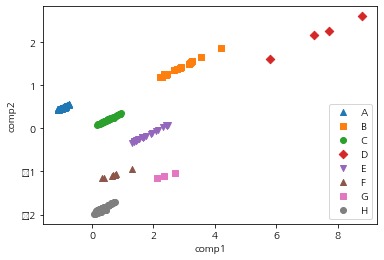

In [ ]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=markers=['^', 's', 'o', 'D', 'v', '^', 's', 'o']

# comp1을 x축, comp2를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
    x_axis_data = register_df_pca_ss[register_df_pca_ss['target']==i]['comp1']
    y_axis_data = register_df_pca_ss[register_df_pca_ss['target']==i]['comp2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=['A', 'B','C','D','E', 'F','G','H'][i])
    # plt.scatter(x_axis_data, y_axis_data)
    
plt.legend()
plt.xlabel('comp1')
plt.ylabel('comp2')
plt.show()

#### 군집화 평가 - 실루엣 분석

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):     
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
   
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
   
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
   
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
       
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
       
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
       
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
       
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
           
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
           
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known

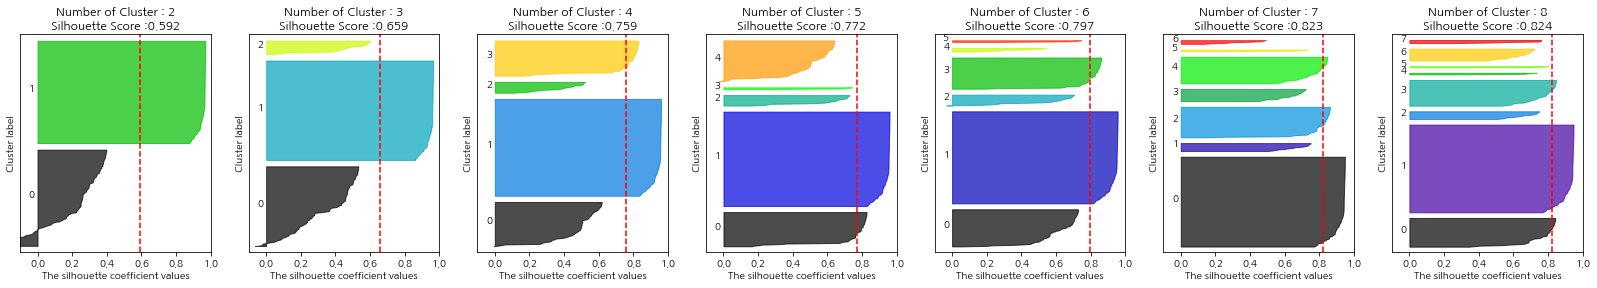

In [ ]:
visualize_silhouette([2, 3, 4, 5, 6, 7, 8], register_scaled_ss)

군집수는 5개가 적절하다.

### 정규화 데이터

In [ ]:
pca = PCA(n_components=2)
register_pca_mm = pca.fit_transform(register_scaled_mm)
register_pca_mm

array([[ 3.07900667e-01,  1.45137211e-01],
       [ 3.17335732e-01,  2.00373430e-01],
       [ 3.25973130e-01,  2.60176823e-01],
       [ 3.03556181e-01,  1.19394415e-01],
       [ 3.02562398e-01,  1.10747689e-01],
       [ 6.89969824e-01, -1.75182336e-01],
       [ 6.95638670e-01, -1.39986287e-01],
       [ 6.93575445e-01, -1.53075225e-01],
       [ 5.17142773e-03,  6.14408477e-02],
       [-8.52901139e-02,  3.95043175e-01],
       [-3.04382054e-01, -6.46977284e-02],
       [ 3.59318892e-03,  5.25373196e-02],
       [ 6.94033328e-01, -1.50107854e-01],
       [ 6.96877747e-03,  7.23220275e-02],
       [ 6.93239054e-01, -1.54042641e-01],
       [ 7.00740384e-01, -1.08057083e-01],
       [ 7.68758085e-03,  7.76579714e-02],
       [ 1.87820101e-04,  3.19711424e-02],
       [ 4.45603759e-04,  3.37422566e-02],
       [ 6.95106272e-01, -1.42632477e-01],
       [ 3.04210565e-01,  1.21926556e-01],
       [ 3.06805538e-01,  1.39431012e-01],
       [ 3.22239837e-01,  2.33473163e-01],
       [-5.

In [ ]:
pca.explained_variance_ratio_

array([0.80106812, 0.18680983])

In [ ]:
register_df_pca_mm = pd.DataFrame(data=register_pca_mm, columns=['comp1', 'comp2'])
register_df_pca_mm['target'] = register_clustered.target
register_df_pca_mm[:3]

,comp1,comp2,target
0,0.307901,0.145137,4
1,0.317336,0.200373,4
2,0.325973,0.260177,4


C:\Users\Administrator\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


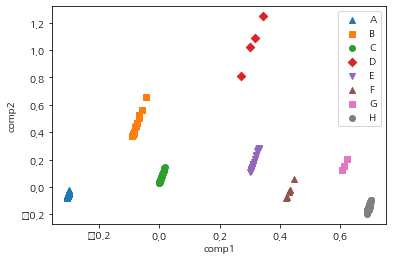

In [ ]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o', 'D', 'v', '^', 's', 'o']

# comp1을 x축, comp2를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
    x_axis_data = register_df_pca_mm[register_df_pca_mm['target']==i]['comp1']
    y_axis_data = register_df_pca_mm[register_df_pca_mm['target']==i]['comp2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=['A', 'B','C','D','E', 'F', 'G', 'H'][i])
    # plt.scatter(x_axis_data, y_axis_data)
    
plt.legend()
plt.xlabel('comp1')
plt.ylabel('comp2')
plt.show()

In [ ]:
register_scaled_mm

array([[0.21904631, 0.23392314, 0.57142857],
       [0.26721176, 0.26560122, 0.57142857],
       [0.28913014, 0.32781583, 0.57142857],
       ...,
       [0.15239797, 0.16542998, 0.28571429],
       [0.17692731, 0.19977169, 0.28571429],
       [0.16641473, 0.18274353, 0.28571429]])

#### 군집화 평가 - 실루엣 분석

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known

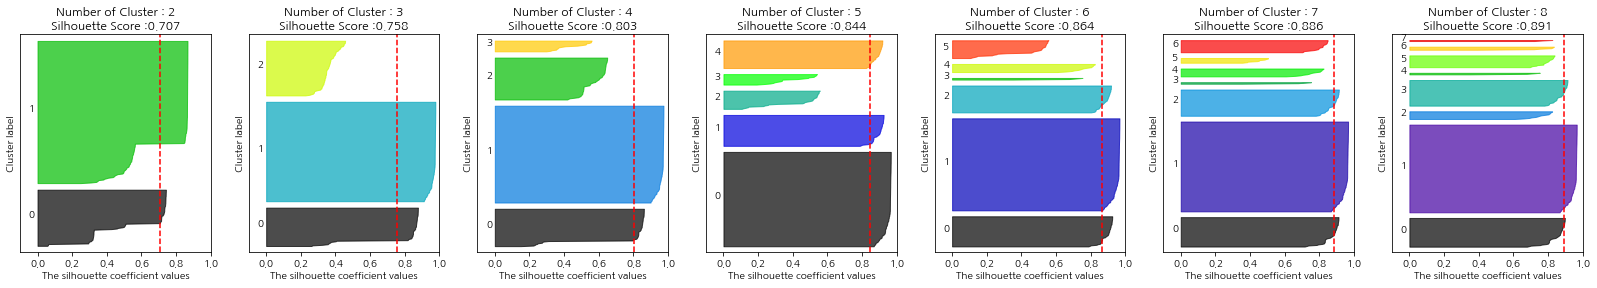

In [ ]:
visualize_silhouette([2, 3, 4, 5, 6, 7, 8], register_scaled_mm)

군집수는 4개가 적절해 보임.

# 군집화 (n=7)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
register = pd.read_csv('./data/서울시동물등록현황.csv', encoding='cp949')

register['소유자당반려동물수'] = round(register['등록동물수'] / register['소유자수'], 2)
register

,자치구,법정동,등록동물수,소유자수,소유자당반려동물수
0,강남구,개포동,3189,2459.0,1.30
1,강남구,논현동,3890,2792.0,1.39
2,강남구,대치동,4209,3446.0,1.22
3,강남구,도곡동,2877,2294.0,1.25
4,강남구,삼성동,2902,2152.0,1.35
...,...,...,...,...,...
329,중랑구,면목동,7623,5919.0,1.29
330,중랑구,묵동,2441,1977.0,1.23
331,중랑구,상봉동,2219,1739.0,1.28
332,중랑구,신내동,2576,2100.0,1.23


In [ ]:
register_df = register.iloc[:, 2:4]

In [ ]:
register_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   등록동물수   334 non-null    int64  
 1   소유자수    334 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.3 KB


In [ ]:
register_df['소유자수'] = register_df['소유자수'].astype('int')

In [ ]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=1000, random_state=0)
kmeans.fit(register_df)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(max_iter=1000, n_clusters=7, random_state=0)

In [ ]:
print(kmeans.labels_)

[1 1 1 1 1 0 0 0 6 3 4 6 0 6 0 0 6 6 6 0 1 1 1 3 6 3 0 6 4 0 6 1 0 1 6 4 4
 2 0 2 2 4 0 4 4 0 0 4 4 6 0 6 4 0 0 4 4 4 0 3 3 3 2 1 3 6 0 6 6 5 1 4 6 6
 1 6 0 0 4 6 0 6 4 4 3 3 6 6 0 4 4 4 4 0 4 4 6 4 0 0 6 4 4 4 0 0 4 4 4 4 4
 4 0 4 4 3 3 3 4 6 4 0 4 1 6 4 0 4 4 6 4 0 4 0 0 0 4 6 6 4 4 0 0 4 6 0 4 0
 1 1 6 6 1 6 6 1 1 6 6 6 6 6 3 6 6 5 5 5 4 6 6 0 0 3 6 6 0 0 4 4 4 4 4 4 0
 4 4 4 4 4 4 0 0 6 6 4 4 0 0 6 0 0 1 6 6 6 1 0 1 1 3 0 6 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 6 3 6 6 6
 6]


In [ ]:
register_clustered = register_df.copy()

In [ ]:
register_clustered['target'] = kmeans.labels_

## 군집 평가

### 실루엣 분석

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_score(register_clustered, kmeans.labels_)

0.6111637314827776

In [ ]:
print(silhouette_samples(register_clustered, kmeans.labels_))
silhouette_samples(register_clustered, kmeans.labels_).mean()

[ 0.61336641  0.65722178  0.33488764  0.3586288   0.26523346  0.12659707
  0.59482211  0.52832098  0.54170745  0.47183633  0.83964051  0.44593709
  0.54884766  0.60702111  0.4847213   0.42881963  0.6200186   0.07967092
  0.11590847  0.57140671  0.42417823  0.57262148  0.5266004   0.61892963
  0.19737112  0.69193697  0.12823532  0.6386786   0.84282769  0.61036525
  0.60792845  0.66534843  0.20852051  0.6727622   0.45852222  0.86042122
  0.87239929  0.71761067  0.52884277  0.19776533  0.64191984  0.73574708
 -0.07904006  0.82128761  0.86808473  0.37363743  0.16285321  0.76849229
  0.74062064  0.61533299  0.57370163  0.1018425   0.65103952  0.32422692
  0.60027794  0.81596551  0.65973263  0.70603624  0.59293308  0.667837
  0.6956153   0.28163761  0.66037371  0.21085248  0.66066593  0.3122971
  0.2273013   0.18183493  0.19329559  0.17426568  0.51690344  0.76834536
  0.28399907  0.40807115  0.0382298   0.44902052  0.17927575  0.60685895
  0.29685888  0.51495376  0.28388569  0.55035332  0.68

0.6111637314827776

## 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### 표준화

In [ ]:
 
# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
register_scaled_ss = StandardScaler().fit_transform(register_clustered.iloc[:, :])

In [ ]:
register_scaled_ss

array([[ 0.89389744,  1.04021173, -1.22462698],
       [ 1.24188596,  1.26340148, -1.22462698],
       [ 1.40024308,  1.70173813, -1.22462698],
       ...,
       [ 0.41237266,  0.55763928,  1.34462811],
       [ 0.58959364,  0.79959574,  1.34462811],
       [ 0.51364179,  0.67962287,  1.34462811]])

### 정규화

In [ ]:
scaler_ = MinMaxScaler()
scaler_.fit(register_clustered)
register_scaled_mm = scaler_.transform(register_clustered)

## PCA 차원 축소

In [ ]:
from sklearn.decomposition import PCA

### 표준화 데이터

In [ ]:
pca = PCA(n_components=2)
register_pca_ss = pca.fit_transform(register_scaled_ss)
register_pca_ss

array([[ 1.55563486e+00,  9.77606044e-01],
       [ 1.95346373e+00,  9.06589504e-01],
       [ 2.36975787e+00,  8.40836181e-01],
       [ 1.37070915e+00,  1.01033119e+00],
       [ 1.31285144e+00,  1.01803811e+00],
       [-1.51468863e-01,  1.79141756e+00],
       [ 9.88866760e-02,  1.74858781e+00],
       [ 6.19381479e-03,  1.76419844e+00],
       [ 2.00685598e-01, -1.39574696e+00],
       [ 2.67679242e+00, -2.58266027e-01],
       [-8.46426516e-01, -1.74156703e-01],
       [ 1.36034624e-01, -1.38389470e+00],
       [ 2.71178163e-02,  1.76072902e+00],
       [ 2.78494762e-01, -1.40930416e+00],
       [-2.33893141e-03,  1.76665007e+00],
       [ 3.25630033e-01,  1.71002251e+00],
       [ 3.15164191e-01, -1.41480494e+00],
       [-1.11055246e-02, -1.35821241e+00],
       [ 1.24140563e-03, -1.36017372e+00],
       [ 7.90927755e-02,  1.75255736e+00],
       [ 1.39097535e+00,  1.00550988e+00],
       [ 1.51343561e+00,  9.85792400e-01],
       [ 2.18500200e+00,  8.69324942e-01],
       [ 3.

In [ ]:
pca.explained_variance_ratio_

array([0.63486914, 0.32466258])

In [ ]:
register_df_pca_ss = pd.DataFrame(data=register_pca_ss, columns=['comp1', 'comp2'])
register_df_pca_ss['target'] = register_clustered.target
register_df_pca_ss[:3]

,comp1,comp2,target
0,1.555635,0.977606,1
1,1.953464,0.906590,1
2,2.369758,0.840836,1


C:\Users\Administrator\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


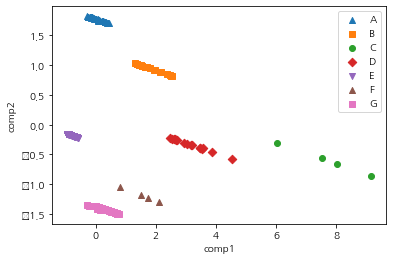

In [ ]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=markers=['^', 's', 'o', 'D', 'v', '^', 's']

# comp1을 x축, comp2를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
    x_axis_data = register_df_pca_ss[register_df_pca_ss['target']==i]['comp1']
    y_axis_data = register_df_pca_ss[register_df_pca_ss['target']==i]['comp2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=['A', 'B','C','D','E', 'F','G'][i])
    # plt.scatter(x_axis_data, y_axis_data)
    
plt.legend()
plt.xlabel('comp1')
plt.ylabel('comp2')
plt.show()

#### 군집화 평가 - 실루엣 분석

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):     
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
   
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
   
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
   
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
       
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
       
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
       
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
       
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
           
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
           
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known

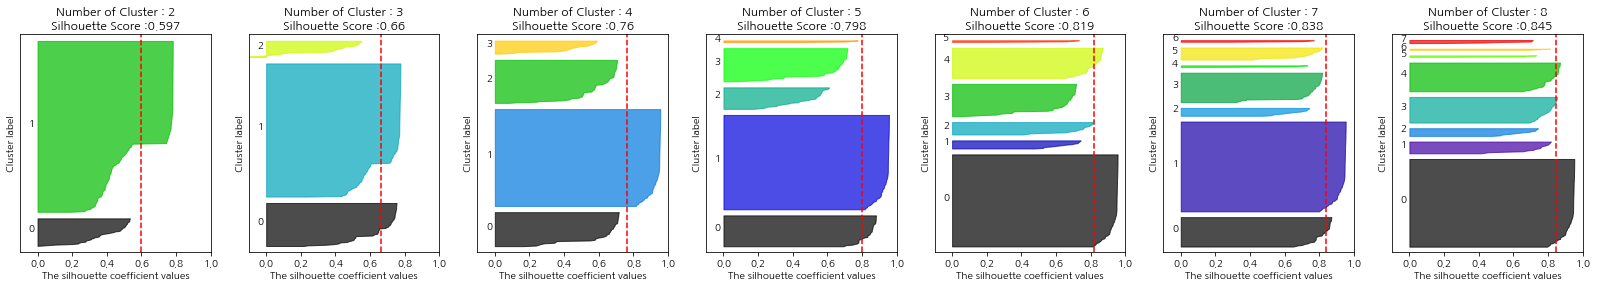

In [ ]:
visualize_silhouette([2, 3, 4, 5, 6, 7, 8], register_scaled_ss)

군집수는 5개가 적절하다.

### 정규화 데이터

In [ ]:
pca = PCA(n_components=2)
register_pca_mm = pca.fit_transform(register_scaled_mm)
register_pca_mm

array([[ 0.41490629,  0.15042371],
       [ 0.4205296 ,  0.20645615],
       [ 0.42695744,  0.26593977],
       [ 0.4122742 ,  0.12434933],
       [ 0.41128994,  0.11593989],
       [ 0.55452318, -0.12058581],
       [ 0.55818015, -0.08513942],
       [ 0.5568105 , -0.09828779],
       [-0.42741507,  0.10550315],
       [ 0.1021438 ,  0.36772997],
       [-0.11367351, -0.10147984],
       [-0.42830914,  0.09642828],
       [ 0.55712313, -0.09531434],
       [-0.42629412,  0.11649526],
       [ 0.55674884, -0.09939735],
       [ 0.56150649, -0.05301378],
       [-0.42570943,  0.12176382],
       [-0.43042603,  0.07564624],
       [-0.43023609,  0.07740937],
       [ 0.55792805, -0.08788397],
       [ 0.41248424,  0.12708415],
       [ 0.41435129,  0.14454505],
       [ 0.42406067,  0.23947141],
       [ 0.11983196,  0.53780853],
       [-0.41980904,  0.17909429],
       [ 0.10938632,  0.43738964],
       [ 0.5543905 , -0.12157142],
       [-0.42416291,  0.13681615],
       [-0.11375821,

In [ ]:
pca.explained_variance_ratio_

array([0.73315747, 0.25033159])

In [ ]:
register_df_pca_mm = pd.DataFrame(data=register_pca_mm, columns=['comp1', 'comp2'])
register_df_pca_mm['target'] = register_clustered.target
register_df_pca_mm[:3]

,comp1,comp2,target
0,0.414906,0.150424,1
1,0.420530,0.206456,1
2,0.426957,0.265940,1


C:\Users\Administrator\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


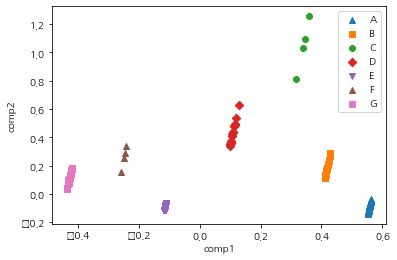

In [ ]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o', 'D', 'v', '^', 's']

# comp1을 x축, comp2를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
    x_axis_data = register_df_pca_mm[register_df_pca_mm['target']==i]['comp1']
    y_axis_data = register_df_pca_mm[register_df_pca_mm['target']==i]['comp2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=['A', 'B','C','D','E', 'F', 'G'][i])
    # plt.scatter(x_axis_data, y_axis_data)
    
plt.legend()
plt.xlabel('comp1')
plt.ylabel('comp2')
plt.show()

In [ ]:
register_scaled_mm

array([[0.21904631, 0.23392314, 0.16666667],
       [0.26721176, 0.26560122, 0.16666667],
       [0.28913014, 0.32781583, 0.16666667],
       ...,
       [0.15239797, 0.16542998, 1.        ],
       [0.17692731, 0.19977169, 1.        ],
       [0.16641473, 0.18274353, 1.        ]])

#### 군집화 평가 - 실루엣 분석

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known

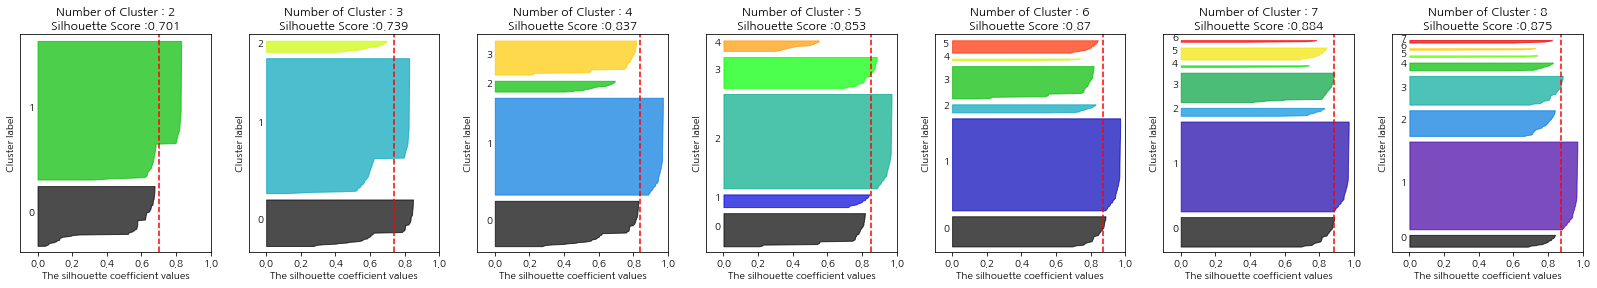

In [ ]:
visualize_silhouette([2, 3, 4, 5, 6, 7, 8], register_scaled_mm)

# 군집화 (n=6)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
register = pd.read_csv('./data/서울시동물등록현황.csv', encoding='cp949')

register['소유자당반려동물수'] = round(register['등록동물수'] / register['소유자수'], 2)
register

,자치구,법정동,등록동물수,소유자수,소유자당반려동물수
0,강남구,개포동,3189,2459.0,1.30
1,강남구,논현동,3890,2792.0,1.39
2,강남구,대치동,4209,3446.0,1.22
3,강남구,도곡동,2877,2294.0,1.25
4,강남구,삼성동,2902,2152.0,1.35
...,...,...,...,...,...
329,중랑구,면목동,7623,5919.0,1.29
330,중랑구,묵동,2441,1977.0,1.23
331,중랑구,상봉동,2219,1739.0,1.28
332,중랑구,신내동,2576,2100.0,1.23


In [ ]:
register_df = register.iloc[:, 2:4]

In [ ]:
register_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   등록동물수   334 non-null    int64  
 1   소유자수    334 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.3 KB


In [ ]:
register_df['소유자수'] = register_df['소유자수'].astype('int')

In [ ]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=1000, random_state=0)
kmeans.fit(register_df)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(max_iter=1000, n_clusters=6, random_state=0)

In [ ]:
print(kmeans.labels_)

[2 2 1 2 2 0 4 0 4 1 0 4 0 4 0 4 4 4 4 4 2 2 2 1 2 1 0 4 0 4 4 2 4 2 4 0 0
 3 0 3 3 0 0 0 0 0 0 0 0 4 4 2 0 0 4 0 0 0 4 1 1 1 3 1 1 2 4 4 4 5 2 0 4 2
 1 2 4 4 0 4 4 4 0 0 1 1 4 4 0 0 0 0 0 0 0 0 4 0 0 4 4 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 0 4 0 4 0 2 4 0 0 0 0 4 0 4 0 0 4 4 0 4 4 0 0 0 4 0 4 4 0 0
 2 2 4 4 2 4 4 2 2 4 4 4 4 4 1 4 4 5 5 5 0 2 2 4 4 1 4 4 0 4 0 0 0 0 0 0 4
 0 0 0 0 0 0 4 0 4 4 0 0 0 4 4 0 4 2 4 4 4 2 0 2 2 1 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 4 2
 2]


In [ ]:
register_clustered = register_df.copy()

In [ ]:
register_clustered['target'] = kmeans.labels_

## 군집 평가

### 실루엣 분석

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_score(register_clustered, kmeans.labels_)

0.6419818996089011

In [ ]:
print(silhouette_samples(register_clustered, kmeans.labels_))
silhouette_samples(register_clustered, kmeans.labels_).mean()

[ 0.72502795  0.48465597  0.07827965  0.69614622  0.6706795   0.56306303
  0.00341052  0.24559613  0.52008429  0.6183828   0.86369426  0.57324959
  0.19299281  0.42594799  0.28920361  0.45996788  0.3743847   0.60891826
  0.61345099 -0.07898666  0.70849552  0.72693444  0.18170507  0.6104819
  0.54324538  0.70138864  0.56501321  0.13386408  0.86492074  0.08659703
  0.37026648  0.6954752   0.54368834  0.6568987   0.56505097  0.86219369
  0.87179525  0.72736187  0.24048632  0.24438926  0.65185608  0.82653575
  0.62040577  0.85673808  0.87150185  0.41578843  0.54082739  0.83835141
  0.8298882   0.33879513  0.31122604  0.56838331  0.79846675  0.45719732
  0.23743496  0.85503122  0.80051525  0.81663908 -0.0269723   0.6961599
  0.68416934  0.51853825  0.67371717  0.20298748  0.65724769  0.42793231
  0.26957845  0.13257642  0.07879927  0.17749023  0.71281571  0.83921693
  0.61789132  0.22640863  0.34599913  0.33857816  0.56441701  0.07523753
  0.6879804   0.53791716  0.53156496  0.50224807  0.8

0.6419818996089011

## 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### 표준화

In [ ]:
 
# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
register_scaled_ss = StandardScaler().fit_transform(register_clustered.iloc[:, :])

In [ ]:
register_scaled_ss

array([[ 0.89389744,  1.04021173,  0.46069755],
       [ 1.24188596,  1.26340148,  0.46069755],
       [ 1.40024308,  1.70173813, -0.13112161],
       ...,
       [ 0.41237266,  0.55763928,  1.64433587],
       [ 0.58959364,  0.79959574,  0.46069755],
       [ 0.51364179,  0.67962287,  0.46069755]])

### 정규화

In [ ]:
scaler_ = MinMaxScaler()
scaler_.fit(register_clustered)
register_scaled_mm = scaler_.transform(register_clustered)

## PCA 차원 축소

In [ ]:
from sklearn.decomposition import PCA

### 표준화 데이터

In [ ]:
pca = PCA(n_components=2)
register_pca_ss = pca.fit_transform(register_scaled_ss)
register_pca_ss

array([[ 1.42621683e+00,  2.20464855e-01],
       [ 1.78876235e+00,  3.88623791e-01],
       [ 1.89533018e+00,  1.12824971e+00],
       [ 1.25791848e+00,  1.40918118e-01],
       [ 1.20726675e+00,  1.03812263e-01],
       [-7.30886600e-01,  4.45653639e-01],
       [ 5.59915756e-01, -1.52896146e+00],
       [-5.87939296e-01,  5.16761621e-01],
       [ 1.12548019e+00, -1.24432048e+00],
       [ 2.33450410e+00,  1.32776182e+00],
       [-1.04464153e+00,  2.86322228e-01],
       [ 1.06631664e+00, -1.27014517e+00],
       [-5.69081349e-01,  5.26888402e-01],
       [ 1.19612529e+00, -1.20982643e+00],
       [-5.96450082e-01,  5.17635433e-01],
       [ 7.65037083e-01, -1.42389812e+00],
       [ 1.22871539e+00, -1.18928313e+00],
       [ 9.32688308e-01, -1.33515709e+00],
       [ 9.43748076e-01, -1.32876671e+00],
       [ 5.41532202e-01, -1.53522348e+00],
       [ 1.27733984e+00,  1.43676176e-01],
       [ 1.38724312e+00,  2.05780587e-01],
       [ 1.99654644e+00,  5.06121771e-01],
       [ 3.

In [ ]:
pca.explained_variance_ratio_

array([0.72474352, 0.23902121])

In [ ]:
register_df_pca_ss = pd.DataFrame(data=register_pca_ss, columns=['comp1', 'comp2'])
register_df_pca_ss['target'] = register_clustered.target
register_df_pca_ss[:3]

,comp1,comp2,target
0,1.426217,0.220465,2
1,1.788762,0.388624,2
2,1.895330,1.128250,1


C:\Users\Administrator\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


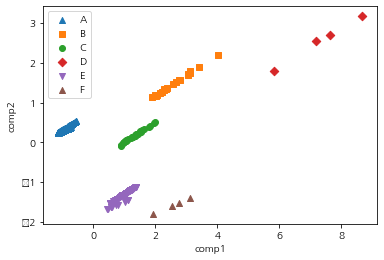

In [ ]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=markers=['^', 's', 'o', 'D', 'v', '^']

# comp1을 x축, comp2를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
    x_axis_data = register_df_pca_ss[register_df_pca_ss['target']==i]['comp1']
    y_axis_data = register_df_pca_ss[register_df_pca_ss['target']==i]['comp2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=['A', 'B','C','D','E', 'F'][i])
    # plt.scatter(x_axis_data, y_axis_data)
    
plt.legend()
plt.xlabel('comp1')
plt.ylabel('comp2')
plt.show()

#### 군집화 평가 - 실루엣 분석

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):     
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
   
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
   
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
   
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
       
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
       
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
       
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
       
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
           
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
           
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known

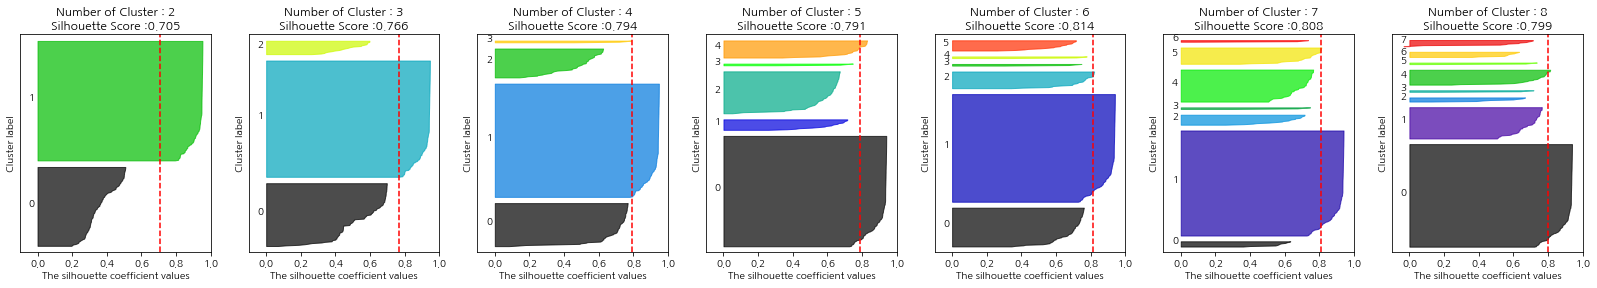

In [ ]:
visualize_silhouette([2, 3, 4, 5, 6, 7, 8], register_scaled_ss)

군집수는 5개가 적절하다.

### 정규화 데이터

In [ ]:
pca = PCA(n_components=2)
register_pca_mm = pca.fit_transform(register_scaled_mm)
register_pca_mm

array([[ 0.20635009,  0.13624053],
       [ 0.22401461,  0.1890974 ],
       [ 0.05104129,  0.30830665],
       [ 0.19817827,  0.11156461],
       [ 0.19596952,  0.10290532],
       [-0.25213791,  0.01460944],
       [ 0.51984795, -0.1943358 ],
       [-0.2452645 ,  0.03590018],
       [ 0.54697937, -0.10979045],
       [ 0.07251919,  0.3719432 ],
       [-0.26716236, -0.03242652],
       [ 0.54406592, -0.11826471],
       [-0.24437194,  0.03877877],
       [ 0.55038857, -0.09932914],
       [-0.24577098,  0.03511082],
       [ 0.52965327, -0.16350131],
       [ 0.55187314, -0.09406953],
       [ 0.53761279, -0.13803072],
       [ 0.53812766, -0.13630024],
       [ 0.51890912, -0.19680394],
       [ 0.19924355,  0.11381089],
       [ 0.20438655,  0.1308761 ],
       [ 0.23373642,  0.22136879],
       [ 0.12418455,  0.53558962],
       [ 0.18892135,  0.08222121],
       [ 0.09368652,  0.43895766],
       [-0.25234219,  0.0135049 ],
       [ 0.55650529, -0.07968441],
       [-0.26736529,

In [ ]:
pca.explained_variance_ratio_

array([0.80326077, 0.18266539])

In [ ]:
register_df_pca_mm = pd.DataFrame(data=register_pca_mm, columns=['comp1', 'comp2'])
register_df_pca_mm['target'] = register_clustered.target
register_df_pca_mm[:3]

,comp1,comp2,target
0,0.206350,0.136241,2
1,0.224015,0.189097,2
2,0.051041,0.308307,1


C:\Users\Administrator\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


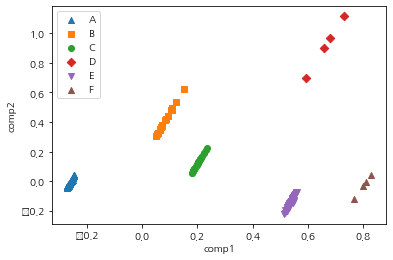

In [ ]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o', 'D', 'v', '^']

# comp1을 x축, comp2를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
    x_axis_data = register_df_pca_mm[register_df_pca_mm['target']==i]['comp1']
    y_axis_data = register_df_pca_mm[register_df_pca_mm['target']==i]['comp2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=['A', 'B','C','D','E', 'F'][i])
    # plt.scatter(x_axis_data, y_axis_data)
    
plt.legend()
plt.xlabel('comp1')
plt.ylabel('comp2')
plt.show()

In [ ]:
register_scaled_mm

array([[0.21904631, 0.23392314, 0.4       ],
       [0.26721176, 0.26560122, 0.4       ],
       [0.28913014, 0.32781583, 0.2       ],
       ...,
       [0.15239797, 0.16542998, 0.8       ],
       [0.17692731, 0.19977169, 0.4       ],
       [0.16641473, 0.18274353, 0.4       ]])

#### 군집화 평가 - 실루엣 분석

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known

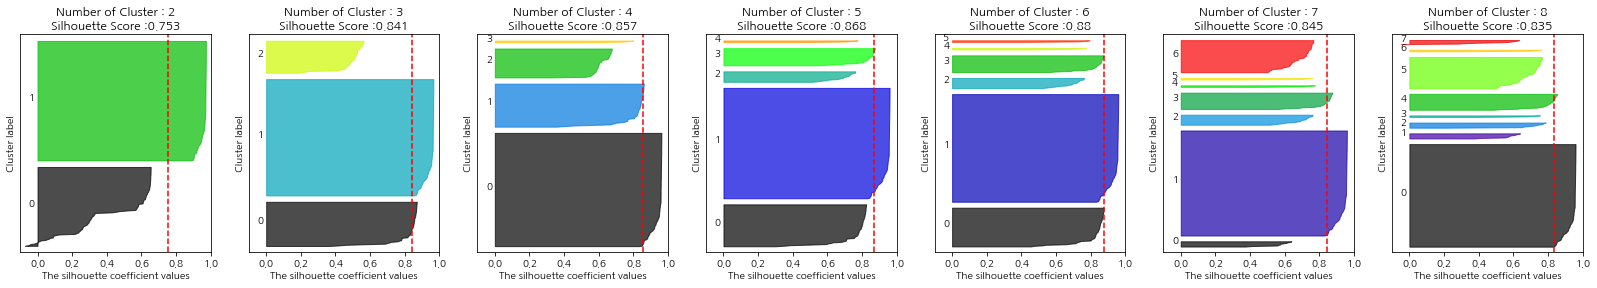

In [ ]:
visualize_silhouette([2, 3, 4, 5, 6, 7, 8], register_scaled_mm)

# 시각화

In [ ]:
register['target'] = kmeans.labels_

In [ ]:
register

,자치구,법정동,등록동물수,소유자수,소유자당반려동물수,target
0,강남구,개포동,3189,2459.0,1.30,3
1,강남구,논현동,3890,2792.0,1.39,2
2,강남구,대치동,4209,3446.0,1.22,2
3,강남구,도곡동,2877,2294.0,1.25,3
4,강남구,삼성동,2902,2152.0,1.35,3
...,...,...,...,...,...,...
329,중랑구,면목동,7623,5919.0,1.29,2
330,중랑구,묵동,2441,1977.0,1.23,3
331,중랑구,상봉동,2219,1739.0,1.28,3
332,중랑구,신내동,2576,2100.0,1.23,3


In [ ]:
register[register['target'] == 4]

,자치구,법정동,등록동물수,소유자수,소유자당반려동물수,target
37,강서구,화곡동,12567,9567.0,1.31,4
39,관악구,봉천동,9601,7477.0,1.28,4
40,관악구,신림동,14555,10512.0,1.38,4
62,노원구,상계동,11091,9596.0,1.16,4


서울시 동물등록현황 군집화 결과, ( 스케일링, PCA, 실루엣분석 결과 5개 군집) 강서구 화곡동, 관악구 봉천동, 관악구 신림동, 노원구 상계동이 등록동물수와 소유자수가 높은 군집에 속해있음을 확인하였다.
서울도시계획포털(https://urban.seoul.go.kr/) 에서 '개별비오톱 평가도', '동경계', '구경계' 를 범례로 설정하여 확인한 결과, 관악구 신림동 내에 3등급으로 평가된 부분이 다수 발견됨. 또한 3등급 평가 지역 인근에 아파트단지와 산지가 있고, 반려견놀이터는 없음을 발견함. 따라서 이 지역 부근에 있는 해바라기 어린이공원이나 관악도시농업공원 혹은 호암산 입구(호압사 근처)에 반려견놀이터 설치를 추천.

In [ ]:
register_gwanak = register[register['자치구']=='관악구']

In [ ]:
register_gwanak

,자치구,법정동,등록동물수,소유자수,소유자당반려동물수,target
38,관악구,남현동,871,680.0,1.28,1
39,관악구,봉천동,9601,7477.0,1.28,4
40,관악구,신림동,14555,10512.0,1.38,4


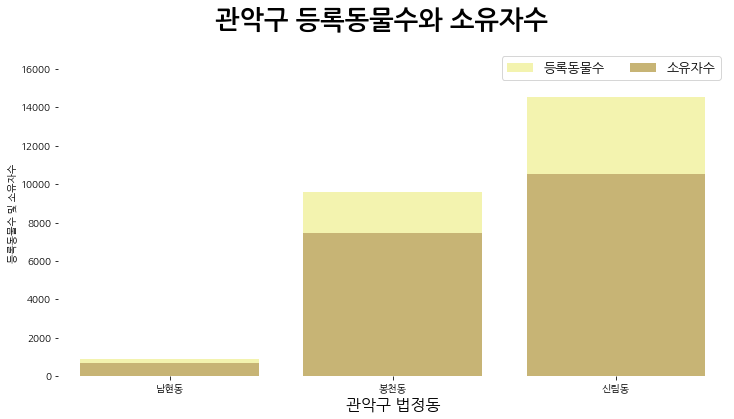

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'

f, ax = plt.subplots(figsize=(12, 6))
ax.xaxis.label.set_size(16)
f.suptitle('관악구 등록동물수와 소유자수', fontsize=26, fontweight='medium')
sns.set_color_codes("pastel")
sns.barplot(x="법정동", y="등록동물수", data=register_gwanak,
            label="등록동물수", color="y")

sns.set_color_codes("muted")
sns.barplot(x="법정동", y="소유자수", data=register_gwanak,
            label="소유자수", color="y")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True, fontsize=13)
ax.set(ylim=(0, 17000), ylabel="등록동물수 및 소유자수",
       xlabel="관악구 법정동")

sns.despine(left=True, bottom=True)
plt.savefig('./data/서울시_관악구_등록동물수와 소유자수.png',
            facecolor='#eeeeee',
            edgecolor='black',
            format='png', dpi=200)

